# Running 200 hyperpolyglot on the same machine as the graph, over 20000 random origins

In [2]:
import pandas as pd
metrics = pd.read_parquet("/home/martin/oar-deployments/2025-06-25-bench3/metrics/179037-200hyplyPerNode/", engine="pyarrow")
xp_length = max(metrics.index)-min(metrics.index)
xp_length

4732

In [3]:
for c in sorted(metrics.columns):
    print(f"total {c}: " + str(metrics[c].sum()))

total bench_case_done: 199970.0
total bench_case_time: 4368581369.153989
total swhfuse_get_blob: 61164357.0
total swhfuse_not_found: 47511738.0
total swhfuse_process_ObjStorageBackend.get_blob: 4158812.8191460003
total swhfuse_process_ObjStorage_content_get: 1442907.7809799998
total swhfuse_process_ObjStorage_objstorage_get: 2936847.812345
total swhfuse_process_get_attrs: 518354.5436860035
total swhfuse_process_get_blob: 4295110.384054
total swhfuse_process_get_metadata: 32214862.907952998
total swhfuse_process_getattr: 235302.154153
total swhfuse_process_lookup: 5616662.939018999
total swhfuse_process_open: 275655.655416
total swhfuse_process_opendir: 40657.969372
total swhfuse_process_read: 4420961.950112
total swhfuse_process_readdir: 1526871.1796440026
total swhfuse_process_readlink: 844.3217810000001
total swhfuse_waiting_graph: 367624322.972839
total swhfuse_waiting_objstorage: 15427064.195614
total swhfuse_waiting_storage: 2177198.0403650003


In [4]:
cases_done = metrics["bench_case_done"].sum()
for c in sorted(metrics.columns):
    print(f"average per process {c}: " + str(metrics[c].sum() / cases_done))

accessed = metrics["swhfuse_get_blob"].sum() - metrics["swhfuse_not_found"].sum()
print(f"Actually accessed files = {accessed}, ie. {accessed / xp_length}/s")

average per process bench_case_done: 1.0
average per process bench_case_time: 21846.183773335946
average per process swhfuse_get_blob: 305.86766514977245
average per process swhfuse_not_found: 237.5943291493724
average per process swhfuse_process_ObjStorageBackend.get_blob: 20.797183673280994
average per process swhfuse_process_ObjStorage_content_get: 7.215621248087212
average per process swhfuse_process_ObjStorage_objstorage_get: 14.686442028029205
average per process swhfuse_process_get_attrs: 2.5921615426614166
average per process swhfuse_process_get_blob: 21.478773736330446
average per process swhfuse_process_get_metadata: 161.09847931166175
average per process swhfuse_process_getattr: 1.1766872738560785
average per process swhfuse_process_lookup: 28.087527824268637
average per process swhfuse_process_open: 1.3784850498374757
average per process swhfuse_process_opendir: 0.20332034491173676
average per process swhfuse_process_read: 22.10812596945542
average per process swhfuse_proce

In [5]:
metrics["swhfuse_not_found"].sum() / metrics["swhfuse_get_blob"].sum()

np.float64(0.7767879910844154)

<Axes: title={'center': 'swh-fuse cumulated waiting times over 200 processes'}, xlabel='xp time (s)', ylabel='waiting time (s)'>

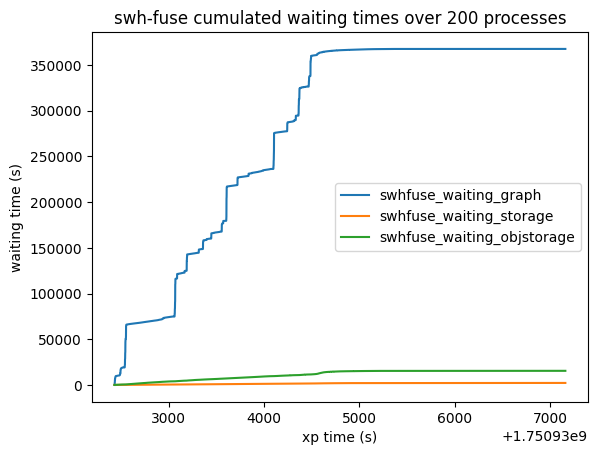

In [6]:
(
    metrics[
        [
            "swhfuse_waiting_graph",
            "swhfuse_waiting_storage",
            "swhfuse_waiting_objstorage",
        ]
    ]
    .sort_index()
    .fillna(0.0)
    .cumsum()
    / 1000
).plot(
    title="swh-fuse cumulated waiting times over 200 processes",
    xlabel="xp time (s)",
    ylabel="waiting time (s)",
)

<Axes: title={'center': 'Number of object access/s'}>

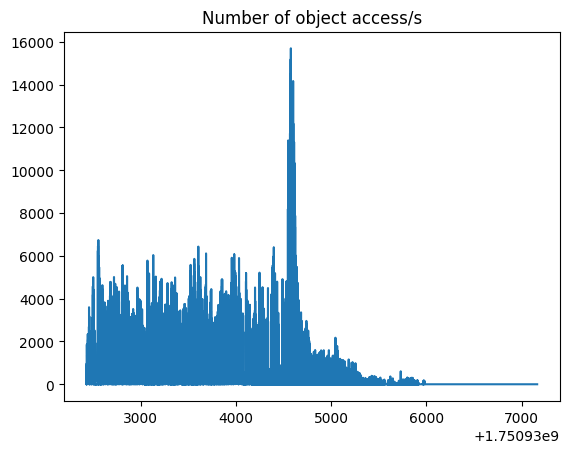

In [7]:
(metrics["swhfuse_get_blob"].sort_index().fillna(0.0) - metrics["swhfuse_not_found"].sort_index().fillna(0.0)).plot(title="Number of object access/s")


<Axes: title={'center': 'Hyply duration distribution'}, xlabel='duration (s)', ylabel='#origins'>

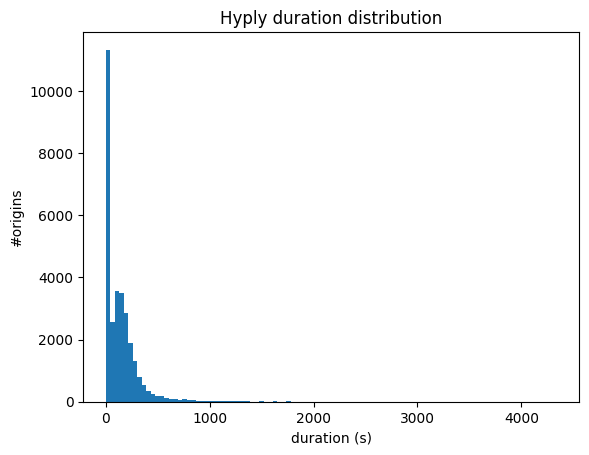

In [15]:
(metrics["bench_case_time"].fillna(0.0)/1000).plot.hist(title="Hyply duration distribution", bins=100, xlabel="duration (s)", ylabel="#origins")
